# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from GloVe.weights import *
from Axes.projection_functions import *
from Clustering.clustering_spectral import *

import matplotlib.pyplot as plt

os.chdir("../")

In [4]:
os.getcwd()

'/Users/alexandrequeant/Desktop/Travail-TSE'

In [6]:
df = pd.read_csv('data/with parliament/current_dataframes/df', index_col=[0]).reset_index()
df_BT = pd.read_csv('data/with parliament/current_dataframes/df_BT', index_col=[0]).reset_index()

# **Data selection**

### Year selection

In [7]:
year = 2015
model_sentences = txt_to_model_sentences('data/with parliament/sentence_embeddings/sentence_embeddings_'+str(year)+'.txt')
df_t= df_BT.loc[df_BT['year'] == year]

#### Cosine thresholding

In [7]:
#df_t = df_t.loc[(df_t['cos axe 1'] < -0.4) | (df_t['cos axe 1'] > 0.3)]

#### Tails

In [8]:
#df_sorted = df_t.sort_values(by=['cos axe 1'], ascending=False)
#df_t = df_sorted.tail(1000)

#### Quantiles

In [8]:
def get_quantiles(data, percentiles):
    """
    Compute quantiles for a given dataset and percentiles.
    
    :param data: Numerical data from which to calculate quantiles.
    :param percentiles: A list of percentiles to calculate for the data.
    :return: An array of quantiles corresponding to the specified percentiles.
    """
    return np.percentile(data, percentiles)

percentiles = [5, 95]
quantiles = get_quantiles(df['cos axe 1'], percentiles)

In [9]:
df_t = df_t.loc[(df_t['cos axe 1'] < quantiles[0]) | (df_t['cos axe 1'] > quantiles[1])]

# **Load the data**

In [10]:
embeds_list = [model_sentences[sentence] for sentence in df_t['text']]
data = np.array(embeds_list)

# **Clusters**

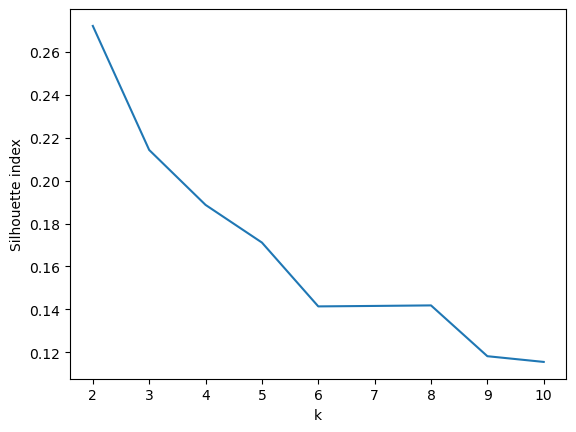

None


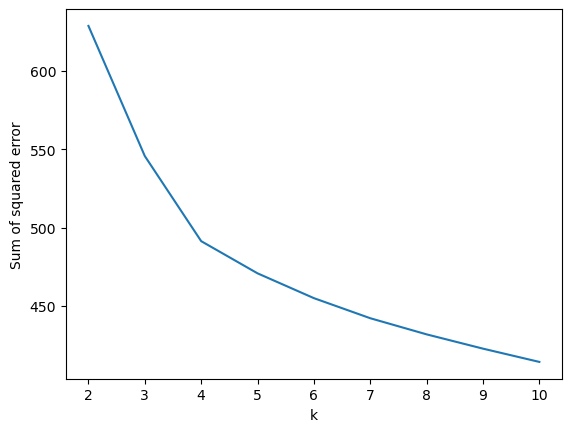

None


In [11]:
plot_silhouette_and_sse(11, data)

In [12]:
plot_clusters_on_pc_kmeans(7, data), plot_clusters_on_pc_spectral(7, data)

(None, None)

In [13]:
plot_clusters_on_pc_kmeans_3d(7, data, marker_size=1.4), plot_clusters_on_pc_spectral_3d(7, data, marker_size=1.4)

(None, None)

In [14]:
visualize_main_words_in_clusters_TFIDF(7, data, df_t)